# Organização dos Dados

# Tidy Data

Algumas formas de organização dos dados são melhores para uma pessoa analisar outras são mais interessantes para a análise computacional. Hadley Wickham, no artigo [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html), publicado no Journal of Statistical Software, aborda o assunto de forma simples, exemplificando situações onde os dados precisam ser reorganizados para facilitar sua análise. Wickham afirma que:

> "Tidy Data é uma maneira padrão de mapear o significado de um conjunto de dados para sua estrutura. Um conjunto de dados é bagunçado ou organizado, dependendo de como linhas, colunas e tabelas são combinadas com observações, variáveis e tipos."

Em sua abordagem, são definidos três pilares que devem reger a organização de um dataset:

* cada variável forma uma coluna
* cada observação forma uma linha
* cada unidade observacional forma uma tabela

O artigo descreve, ainda, os cinco problemas mais comuns encontrados nos datasets e quais técnicas utilizar para reorganizar os dados para que os pilares citados acima sejam respeitados.

# Dívida e PIB por UF

## Datasets

### Dívida dos Estados por Ano

Este conjunto de dados abrange o estoque da dívida dos Governos estaduais e DF, segregado por administração direta e administração indireta custeada pelo Tesouro estadual.

#### Arquivos:

* dados/de_relatorio_estoque_final.csv
* de_metadados_relatorio_estoque_final.pdf

#### Origem:

http://dados.gov.br/dataset/estoque-da-divida-de-estados-e-do-distrito-federal/resource/f9a981c0-6281-43b2-9238-5270eacd4a77?inner_span=True


### PIB dos Estados por Ano

PIB Estadual a preços de mercado corrente.

#### Arquivos:

* dados/de_ipeadata_pib_estados_preco_de_mercado_corrente.csv

#### Origem:

http://www.ipeadata.gov.br/

http://www.ipeadata.gov.br/SelNivelR.aspx?serid=1540855420&module=R

# Prática

## Exercício 01

Realize a leitura de ambos os datasets e aplique os princípios do Tidy Data para criar um único dataset que deverá conter as informações de PIB e Dívida dos estados.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 1000

In [28]:
df_divida = pd.read_csv(
        'dados/de_relatorio_estoque_final.csv',
        sep=';',
        header=2,
        encoding='ansi',
    )

In [29]:
df_divida.columns

Index(['DISCRIMINAÇÃO de credores', 'ANO', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE',
       'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
       'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42'],
      dtype='object')

In [30]:
df_divida_01.columns

Index(['ANO', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS',
       'SC', 'SE', 'SP', 'TO'],
      dtype='object')

In [31]:
def converter_numero(v):
    try:
        if type(v) == float or type(v) == int:
            return v
        else:
            return float(str(v).replace('.', '').replace(',', '.'))
    except:
        return np.nan

In [32]:
df_divida.head()
df_divida_01 = df_divida.loc[
    df_divida['DISCRIMINAÇÃO de credores'] == 'DÍVITA TOTAL (Adm. Direta e Indireta)', 'ANO':'TO'
].copy()
df_divida_01 = df_divida_01.reset_index(drop=True)
df_divida_01.head()

,ANO,AC,AL,AM,AP,BA,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,1996,"496.167.400,00","1.336.063.226,80","1.339.077.760,60","72.350.000,00","5.051.360.926,00","1.914.695.155,20","914.624.000,00","970.495.656,60","5.339.870.576,02",...,"2.714.774.210,60","8.858.624.026,00","553.568.706,80","513.126.727,00","78.600.206,03","9.215.137.103,10","3.746.107.567,80","975.204.018,20","50.922.619.418,00","203.010.099,40"
1,1997,"518.193.236,05","1.915.425.521,96","1.365.492.378,88","75.450.000,00","5.185.699.897,24","1.756.071.263,21","826.197.000,00","1.217.145.609,78","6.175.958.952,42",...,"2.625.403.635,71","13.910.376.235,99","641.498.749,51","277.554.042,59","76.633.323,70","10.780.340.119,46","4.070.235.316,62","783.147.525,32","52.285.477.029,44","307.877.996,53"
2,1998,"545.164.412,53","2.503.891.740,97","1.616.159.702,15","84.395.000,00","7.023.265.633,39","2.219.451.876,51","1.244.621.000,00","2.067.171.833,68","6.889.195.785,08",...,"2.411.360.364,66","21.576.954.717,14","650.025.215,91","1.851.440.159,15","88.169.352,47","13.171.120.879,55","4.326.034.350,44","765.651.182,23","54.703.524.607,59","233.243.000,00"
3,1999,"791.895.413,30","3.151.235.387,49","2.087.434.948,96","101.031.000,00","8.483.442.271,78","3.325.264.649,38","1.340.334.920,00","2.520.877.423,89","7.567.903.214,40",...,"9.316.582.805,75","23.385.175.202,19","897.169.830,00","1.974.119.859,76","161.056.000,00","15.984.646.267,96","5.817.251.599,32","983.207.013,23","62.402.882.751,56","480.541.000,00"
4,2000,"715.259.628,70","3.073.980.980,23","1.920.488.632,83","113.377.000,00","9.127.751.634,22","3.530.759.336,26","1.163.374.333,41","2.660.989.863,49","8.428.106.917,85",...,"8.492.432.806,54","26.150.524.078,35","1.081.343.938,76","1.872.237.809,20","168.276.778,68","17.974.267.004,73","6.165.272.861,73","1.051.001.297,00","69.543.959.783,36","554.977.901,93"


In [33]:
df_divida_02 = df_divida_01.copy()
df_divida_02 = pd.melt(
    df_divida_01, 
    id_vars='ANO', 
    var_name='UF', 
    value_name='Dívida')
df_divida_02.head()

,ANO,UF,Dívida
0,1996,AC,"496.167.400,00"
1,1997,AC,"518.193.236,05"
2,1998,AC,"545.164.412,53"
3,1999,AC,"791.895.413,30"
4,2000,AC,"715.259.628,70"


In [34]:
df_divida_02['ANO'] = df_divida_02['ANO'].apply(lambda x: int(x))
df_divida_02['Dívida'] = df_divida_02['Dívida'].apply(converter_numero)
df_divida_02.info()
df_divida_02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 3 columns):
ANO       567 non-null int64
UF        567 non-null object
Dívida    567 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.4+ KB


,ANO,UF,Dívida
0,1996,AC,4.961674e+08
1,1997,AC,5.181932e+08
2,1998,AC,5.451644e+08
3,1999,AC,7.918954e+08
4,2000,AC,7.152596e+08


In [41]:
df_pib = pd.read_csv(
    'dados/de_ipeadata_pib_estados_preco_de_mercado_corrente.csv',
    sep=';',
    header=1,
)
df_pib.head()

,Sigla,Código,Estado,1990,1991,1992,1993,1994,1995,1996,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,Unnamed: 26
0,AC,12,Acre,"15,99639309","80,80820123","928,0680459","20105,63289","548356,3313","1237096,725","1459645,547",...,"3940314,681","4482918,968","4834621,202","5760499,894","6730107,014","7386436,282","8476514,711","8794361,637","9629238,676",NaN
1,AL,27,Alagoas,"81,60226627","428,9000432","4630,854661","93464,35972","2386299,951","4656515,994","5369180,034",...,"12890508,99","14139343,77","15748040,09","17793223,18","19476857,52","21234950,63","24574808,01","28540303,89","29544708,36",NaN
2,AM,13,Amazonas,"210,0455169","1015,38191","10138,26866","266842,2454","5878452,277","10069421,18","12495041,42",...,"30313729,31","33352132,25","39156909,68","42023210,12","46822561,04","49614250,55","59779291,83","64555403,73","64119835,58",NaN
3,AP,16,Amapá,"18,59140125","96,91090206","1125,864717","23048,07566","624582,2361","1506572,834","1819439,914",...,"3846125,342","4361254,714","5260017,965","6022130,33","6764832,739","7404389,145","8265964,663","8968031,818","10419539,4",NaN
4,BA,29,Bahia,"518,9828251","2652,432271","28114,11123","611119,1179","14972456,45","26427274,23","32430856,07",...,"79083213,15","90919322,15","96520719,24","109651822,4","121507036,5","137074670,7","154340457,6","159868615,1","167727375,1",NaN


In [43]:
df_pib_01 = df_pib.drop(columns=['Unnamed: 26', 'Código','Estado'])
for c in df_pib_01.loc[:, '1990':].columns:
    df_pib_01[c] = df_pib_01[c].apply(converter_numero)
df_pib_01.head()

,Sigla,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,AC,15.996393,80.808201,928.068046,20105.63289,5.483563e+05,1.237097e+06,1.459646e+06,1.555307e+06,1.694329e+06,...,3.304771e+06,3.940315e+06,4.482919e+06,4.834621e+06,5.760500e+06,6.730107e+06,7.386436e+06,8.476515e+06,8.794362e+06,9.629239e+06
1,AL,81.602266,428.900043,4630.854661,93464.35972,2.386300e+06,4.656516e+06,5.369180e+06,6.214731e+06,6.676333e+06,...,1.120951e+07,1.289051e+07,1.413934e+07,1.574804e+07,1.779322e+07,1.947686e+07,2.123495e+07,2.457481e+07,2.854030e+07,2.954471e+07
2,AM,210.045517,1015.381910,10138.268660,266842.24540,5.878452e+06,1.006942e+07,1.249504e+07,1.257225e+07,1.319851e+07,...,2.497717e+07,3.031373e+07,3.335213e+07,3.915691e+07,4.202321e+07,4.682256e+07,4.961425e+07,5.977929e+07,6.455540e+07,6.411984e+07
3,AP,18.591401,96.910902,1125.864717,23048.07566,6.245822e+05,1.506573e+06,1.819440e+06,2.030050e+06,2.038323e+06,...,3.434107e+06,3.846125e+06,4.361255e+06,5.260018e+06,6.022130e+06,6.764833e+06,7.404389e+06,8.265965e+06,8.968032e+06,1.041954e+07
4,BA,518.982825,2652.432271,28114.111230,611119.11790,1.497246e+07,2.642727e+07,3.243086e+07,3.652810e+07,3.783813e+07,...,6.814694e+07,7.908321e+07,9.091932e+07,9.652072e+07,1.096518e+08,1.215070e+08,1.370747e+08,1.543405e+08,1.598686e+08,1.677274e+08


In [46]:
df_pib_02 = pd.melt(df_pib_01, id_vars='Sigla', var_name='ANO', value_name='PIB')
df_pib_02['ANO'] = df_pib_02['ANO'].astype(int)
df_pib_02 = df_pib_02.rename(columns={'Sigla': 'UF'})[['ANO', 'UF', 'PIB']]
df_pib_02.head()

,ANO,UF,PIB
0,1990,AC,15.996393
1,1990,AL,81.602266
2,1990,AM,210.045517
3,1990,AP,18.591401
4,1990,BA,518.982825


In [52]:
df_divida_pib = pd.merge(df_divida_02, df_pib_02, how='outer', on=['ANO', 'UF'])
df_divida_pib.head()

,ANO,UF,Dívida,PIB
0,1996,AC,4.961674e+08,1459645.547
1,1997,AC,5.181932e+08,1555306.521
2,1998,AC,5.451644e+08,1694328.657
3,1999,AC,7.918954e+08,1866542.316
4,2000,AC,7.152596e+08,2154284.485


## Exercício 02

Utilize interpolação para completar os valores de PIB faltantes no Dataset.

In [56]:
df_divida_pib_02 = df_divida_pib.sort_values(['ANO', 'UF'], ascending=False)
df_divida_pib_02['Dívida'] = df_divida_pib_02['Dívida'].interpolate()
df_divida_pib_02.head()

,ANO,UF,Dívida,PIB
566,2016,TO,3.076927e+09,NaN
545,2016,SP,2.573549e+11,NaN
524,2016,SE,2.905640e+09,NaN
503,2016,SC,1.971713e+10,NaN
482,2016,RS,6.612660e+10,NaN


In [72]:
lista = []
df_grupos = df_divida_pib.groupby('UF')
for idx, df in df_grupos:
    df = df.sort_values('ANO', ascending=False)
    df['Dívida'] = df['Dívida'].interpolate()
    
    df = df.sort_values('ANO', ascending=True)
    df['PIB'] = df['PIB'].interpolate()
    lista.append(df)

df_interpolado = pd.concat(lista, axis=0)
df_interpolado = df_interpolado.sort_values(['UF', 'ANO'])
df_interpolado = df_interpolado.reset_index(drop=True)
df_interpolado.head(100)

,ANO,UF,Dívida,PIB
0,1990,AC,4.961674e+08,1.599639e+01
1,1991,AC,4.961674e+08,8.080820e+01
2,1992,AC,4.961674e+08,9.280680e+02
3,1993,AC,4.961674e+08,2.010563e+04
4,1994,AC,4.961674e+08,5.483563e+05
5,1995,AC,4.961674e+08,1.237097e+06
6,1996,AC,4.961674e+08,1.459646e+06
7,1997,AC,5.181932e+08,1.555307e+06
8,1998,AC,5.451644e+08,1.694329e+06
9,1999,AC,7.918954e+08,1.866542e+06


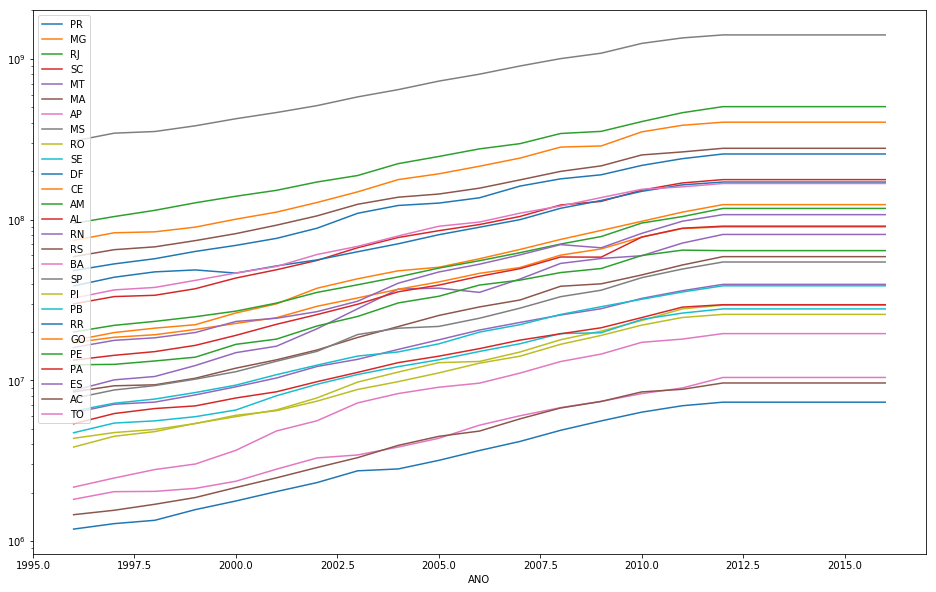

In [84]:
plt.rcParams['figure.figsize'] = 16, 10
ax = None
for uf in set(df_interpolado['UF']):
    ax = df_interpolado[(df_interpolado['UF'] == uf) & (df_interpolado['ANO'] > 1995)].plot(x='ANO', y='PIB', ax=ax, label=uf)
    
plt.yscale('log')
plt.show()